In [1]:
using Pkg
Pkg.activate("/home/coding/julia_projects/Dispersions.jl")
using Dispersions

  Activating project at `~/julia_projects/Dispersions.jl`


In [2]:
using Plots

In [3]:
kG = gen_kGrid("3dsc-$(1/(2*sqrt(6)))", 20)

cP(t=0.20412414523193154) grid in 3 dimensions with 8000 k-points.

In [4]:
β = 11.2

11.2

In [5]:
ω_array(β::Real, grid::AbstractArray{Int64,1})::Vector{Float64}  = Float64[((2.0 *el)* π/β) for el in grid]
ω_array(β::Real, size::Int)::Vector{Float64} = ω_array(β, 0:(size-1))

ω_array (generic function with 2 methods)

In [6]:
ω²_arr = ω_array(β, 10) .^2

10-element Vector{Float64}:
  0.0
  0.31471952809596165
  1.2588781123838466
  2.832475752863655
  5.0355124495353865
  7.867988202399042
 11.32990301145462
 15.421256876702126
 20.142049798141546
 25.492281775772895

In [7]:
χ₀ = Matrix{Float64}(undef, (length(gridPoints(kG)), length(ω²_arr)))
ϵk = expandKArr(kG, dispersion(kG))[:]
tanh_k = tanh.(β .* ϵk / 2)
for (iω², ω²) in enumerate(ω²_arr)
    for (iq, q) in enumerate(gridPoints(kG))
        Ξ = zero(ϵk)
        ϵkq = ϵ_k_plus_q(kG, q)
        tanh_kq = tanh.(β .* ϵkq / 2)
        Δϵ_q = ϵk .- ϵkq
        Δtanh_q = tanh_k .- tanh_kq
        Ξ = 0.5 .* Δϵ_q .* Δtanh_q ./ (ω² .+ Δϵ_q .* Δϵ_q)

        ind0 = abs.(Δϵ_q) .≈ 0
        if (ω² ≈ 0.0) && (any(ind0))
            Ξ[ind0] = ((β/4).*sech.(β .* ϵk ./2) .^ 2)[ind0]
        end

        χ₀[iq, iω²] = sum(Ξ) ./ Nk(kG)
    end
end

In [8]:
length(gridPoints(kG))

286

# Slice through the back of the brillouin zone (kx, ky, $\pi$)
See: maximum can be found at the r-point $(\pi, \pi, \pi)$

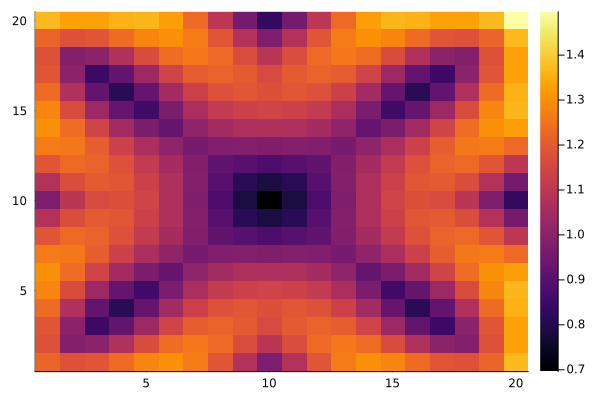

In [9]:
heatmap(expandKArr(kG, χ₀[:,begin])[:,:,Int(begin)])

# Slice through the middle of the brillouin zone (kx, ky, 0)

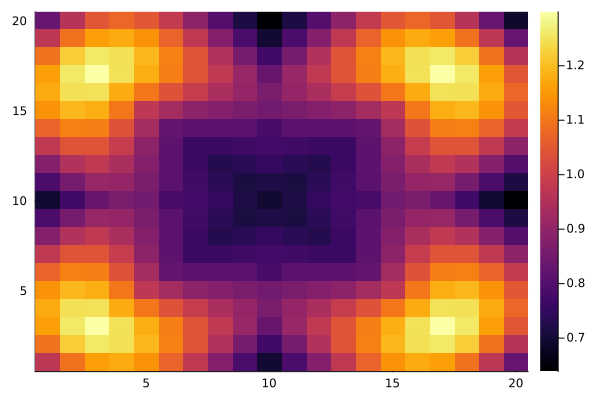

In [10]:
heatmap(expandKArr(kG, χ₀[:,begin])[:,:,Int(end/2)])

In [11]:
expandKArr(kG, χ₀[:,begin])[:,:,Int(begin)]

20×20 Matrix{Float64}:
 1.22083   1.17788   1.18673   1.23364   …  1.17788   1.22083   1.36997
 1.17788   0.986082  0.998283  1.07056      0.986082  1.17788   1.33028
 1.18673   0.998283  0.846958  0.920396     0.998283  1.18673   1.33114
 1.23364   1.07056   0.920396  0.812128     1.07056   1.23364   1.35616
 1.2843    1.16308   1.03299   0.925451     1.16308   1.2843    1.365
 1.3006    1.23529   1.14064   1.04533   …  1.23529   1.3006    1.32513
 1.26474   1.25861   1.20535   1.1336       1.25861   1.26474   1.23024
 1.18595   1.22917   1.21729   1.17597      1.22917   1.18595   1.09836
 1.07822   1.16722   1.2001    1.18839      1.16722   1.07822   0.955415
 0.970265  1.09359   1.15963   1.17501      1.09359   0.970265  0.829293
 1.07822   1.16722   1.2001    1.18839   …  1.16722   1.07822   0.955415
 1.18595   1.22917   1.21729   1.17597      1.22917   1.18595   1.09836
 1.26474   1.25861   1.20535   1.1336       1.25861   1.26474   1.23024
 1.3006    1.23529   1.14064   1.04533  

# Specific values to compare against independent solvers

In [12]:
println("χ₀(q=$(gridPoints(kG)[begin]), ω²=$(ω²_arr[begin]))=$(χ₀[begin,begin])")
println("χ₀(q=$(gridPoints(kG)[end]), ω²=$(ω²_arr[begin]))=$(χ₀[end,begin])")

χ₀(q=(0.0, 0.0, 0.0), ω²=0.0)=0.6961049704016259
χ₀(q=(3.141592653589793, 3.141592653589793, 3.141592653589793), ω²=0.0)=1.4950780641110777


# Check maximum at R-point

In [13]:
maximum(expandKArr(kG, χ₀[:,1])[:,:,Int(end)]) == χ₀[end,begin]

false

In [14]:
maximum(expandKArr(kG, χ₀[:,1])[:,:,:]) - χ₀[end,begin]

0.0012433096967452428

In [15]:
findmax(χ₀)

(1.496321373807823, CartesianIndex(285, 1))

In [16]:
gridPoints(kG)[285]

(3.141592653589793, 3.141592653589793, 2.827433388230814)

In [17]:
length(gridPoints(kG))

286

In [18]:
gridPoints(kG)

286-element Vector{Tuple{Float64, Float64, Float64}}:
 (0.0, 0.0, 0.0)
 (0.3141592653589793, 0.0, 0.0)
 (0.3141592653589793, 0.3141592653589793, 0.0)
 (0.3141592653589793, 0.3141592653589793, 0.3141592653589793)
 (0.6283185307179586, 0.0, 0.0)
 (0.6283185307179586, 0.3141592653589793, 0.0)
 (0.6283185307179586, 0.3141592653589793, 0.3141592653589793)
 (0.6283185307179586, 0.6283185307179586, 0.0)
 (0.6283185307179586, 0.6283185307179586, 0.3141592653589793)
 (0.6283185307179586, 0.6283185307179586, 0.6283185307179586)
 ⋮
 (3.141592653589793, 3.141592653589793, 0.6283185307179586)
 (3.141592653589793, 3.141592653589793, 0.9424777960769379)
 (3.141592653589793, 3.141592653589793, 1.2566370614359172)
 (3.141592653589793, 3.141592653589793, 1.5707963267948966)
 (3.141592653589793, 3.141592653589793, 1.8849555921538759)
 (3.141592653589793, 3.141592653589793, 2.199114857512855)
 (3.141592653589793, 3.141592653589793, 2.5132741228718345)
 (3.141592653589793, 3.141592653589793, 2.827433388230

Der groesste Wert ist somit nicht am R-Punkt, sondern am Nachbar-Punkt gefunden worden.

# check $\chi\left(\mathbf{q}=\Gamma,\omega\neq 0\right)=0$

In [19]:
all(χ₀[begin, begin+1:end] .== 0.0)

true

In [20]:
for (iω², ω²) in enumerate(ω²_arr)
    println("χ₀(q=$(gridPoints(kG)[begin]), ω²=$(ω²))=$(χ₀[begin,iω²])")
end

χ₀(q=(0.0, 0.0, 0.0), ω²=0.0)=0.6961049704016259
χ₀(q=(0.0, 0.0, 0.0), ω²=0.31471952809596165)=0.0
χ₀(q=(0.0, 0.0, 0.0), ω²=1.2588781123838466)=0.0
χ₀(q=(0.0, 0.0, 0.0), ω²=2.832475752863655)=0.0
χ₀(q=(0.0, 0.0, 0.0), ω²=5.0355124495353865)=0.0
χ₀(q=(0.0, 0.0, 0.0), ω²=7.867988202399042)=0.0
χ₀(q=(0.0, 0.0, 0.0), ω²=11.32990301145462)=0.0
χ₀(q=(0.0, 0.0, 0.0), ω²=15.421256876702126)=0.0
χ₀(q=(0.0, 0.0, 0.0), ω²=20.142049798141546)=0.0
χ₀(q=(0.0, 0.0, 0.0), ω²=25.492281775772895)=0.0


# Symm paths (simple cubic 3d)

In [21]:
"""
    max_index(kG::KGrid)

Max integer position along a dimension
"""
function max_index(kG::KGrid)
    return Int(kG.Ns/2)
end

max_index

In [22]:
"""
    to_1d_index(n₁::Int, n₂::Int, n₃::Int, kG::KGrid)

Maps integer position to 1d index in reduced grid array
"""
function to_1d_index(n₁::Int, n₂::Int, n₃::Int, kG::KGrid)
    if (max_index(kG) ≥ n₁) && (n₁ ≥ n₂) && (n₂ ≥ n₃) && (n₃ ≥ 0)
        return Int(n₁*(n₁ + 1)*(n₁ + 2) / 6 + n₂*(n₂ + 1) / 2 + n₃ + 1)
    else
        error("require n₁ ≥ n₂ ≥ n₃")
    end
end
println("$(to_1d_index(0, 0, 0, kG)) ↦ $(gridPoints(kG)[to_1d_index(0, 0, 0, kG)])")
println("$(to_1d_index(1, 1, 1, kG)) ↦ $(gridPoints(kG)[to_1d_index(1, 1, 1, kG)])")
println("$(to_1d_index(2, 2, 2, kG)) ↦ $(gridPoints(kG)[to_1d_index(2, 2, 2, kG)])")
println("$(to_1d_index(3, 3, 3, kG)) ↦ $(gridPoints(kG)[to_1d_index(3, 3, 3, kG)])")
println("$(to_1d_index(4, 4, 4, kG)) ↦ $(gridPoints(kG)[to_1d_index(4, 4, 4, kG)])")
println("$(to_1d_index(5, 5, 5, kG)) ↦ $(gridPoints(kG)[to_1d_index(5, 5, 5, kG)])")
println("$(to_1d_index(6, 6, 6, kG)) ↦ $(gridPoints(kG)[to_1d_index(6, 6, 6, kG)])")
println("$(to_1d_index(7, 7, 7, kG)) ↦ $(gridPoints(kG)[to_1d_index(7, 7, 7, kG)])")
println("$(to_1d_index(8, 8, 8, kG)) ↦ $(gridPoints(kG)[to_1d_index(8, 8, 8, kG)])")
println("$(to_1d_index(9, 9, 9, kG)) ↦ $(gridPoints(kG)[to_1d_index(9, 9, 9, kG)])")
println("$(to_1d_index(10,10,10, kG)) ↦ $(gridPoints(kG)[to_1d_index(10,10,10, kG)])")

1 ↦ (0.0, 0.0, 0.0)
4 ↦ (0.3141592653589793, 0.3141592653589793, 0.3141592653589793)
10 ↦ (0.6283185307179586, 0.6283185307179586, 0.6283185307179586)
20 ↦ (0.9424777960769379, 0.9424777960769379, 0.9424777960769379)
35 ↦ (1.2566370614359172, 1.2566370614359172, 1.2566370614359172)
56 ↦ (1.5707963267948966, 1.5707963267948966, 1.5707963267948966)
84 ↦ (1.8849555921538759, 1.8849555921538759, 1.8849555921538759)
120 ↦ (2.199114857512855, 2.199114857512855, 2.199114857512855)
165 ↦ (2.5132741228718345, 2.5132741228718345, 2.5132741228718345)
220 ↦ (2.827433388230814, 2.827433388230814, 2.827433388230814)
286 ↦ (3.141592653589793, 3.141592653589793, 3.141592653589793)


In [23]:
function Γ_index(kG)
    return to_1d_index(0, 0, 0, kG)
end
println(gridPoints(kG)[Γ_index(kG)])

function X_index(kG)
    return to_1d_index(max_index(kG), 0, 0, kG)
end
println(gridPoints(kG)[X_index(kG)])

function M_index(kG)
    return to_1d_index(max_index(kG), max_index(kG), 0, kG)
end
println(gridPoints(kG)[M_index(kG)])

function R_index(kG)
    return to_1d_index(max_index(kG), max_index(kG), max_index(kG), kG)
end
println(gridPoints(kG)[R_index(kG)])

(0.0, 0.0, 0.0)
(3.141592653589793, 0.0, 0.0)
(3.141592653589793, 3.141592653589793, 0.0)
(3.141592653589793, 3.141592653589793, 3.141592653589793)


In [24]:
"""
    Γ_to_R(kG::KGrid)

returns indices of q points along the symm path Γ_to_R
"""
function Γ_to_R(kG::KGrid)
    return [to_1d_index(n, n, n, kG) for n in 0:max_index(kG)]
end
gridPoints(kG)[Γ_to_R(kG)]

11-element Vector{Tuple{Float64, Float64, Float64}}:
 (0.0, 0.0, 0.0)
 (0.3141592653589793, 0.3141592653589793, 0.3141592653589793)
 (0.6283185307179586, 0.6283185307179586, 0.6283185307179586)
 (0.9424777960769379, 0.9424777960769379, 0.9424777960769379)
 (1.2566370614359172, 1.2566370614359172, 1.2566370614359172)
 (1.5707963267948966, 1.5707963267948966, 1.5707963267948966)
 (1.8849555921538759, 1.8849555921538759, 1.8849555921538759)
 (2.199114857512855, 2.199114857512855, 2.199114857512855)
 (2.5132741228718345, 2.5132741228718345, 2.5132741228718345)
 (2.827433388230814, 2.827433388230814, 2.827433388230814)
 (3.141592653589793, 3.141592653589793, 3.141592653589793)

In [25]:
"""
    Γ_to_X(kG::KGrid)

    returns indices of q points along the symm path Γ_to_X
"""
function Γ_to_X(kG::KGrid)
    return [to_1d_index(n, 0, 0, kG) for n in 0:max_index(kG)]
end
gridPoints(kG)[Γ_to_X(kG)]

11-element Vector{Tuple{Float64, Float64, Float64}}:
 (0.0, 0.0, 0.0)
 (0.3141592653589793, 0.0, 0.0)
 (0.6283185307179586, 0.0, 0.0)
 (0.9424777960769379, 0.0, 0.0)
 (1.2566370614359172, 0.0, 0.0)
 (1.5707963267948966, 0.0, 0.0)
 (1.8849555921538759, 0.0, 0.0)
 (2.199114857512855, 0.0, 0.0)
 (2.5132741228718345, 0.0, 0.0)
 (2.827433388230814, 0.0, 0.0)
 (3.141592653589793, 0.0, 0.0)

In [26]:
"""
    X_to_M(kG::KGrid)

    returns indices of q points along the symm path X_to_M

"""
function X_to_M(kG::KGrid)
    return [to_1d_index(max_index(kG), n, 0, kG) for n in 0:max_index(kG)]
end
gridPoints(kG)[X_to_M(kG)]

11-element Vector{Tuple{Float64, Float64, Float64}}:
 (3.141592653589793, 0.0, 0.0)
 (3.141592653589793, 0.3141592653589793, 0.0)
 (3.141592653589793, 0.6283185307179586, 0.0)
 (3.141592653589793, 0.9424777960769379, 0.0)
 (3.141592653589793, 1.2566370614359172, 0.0)
 (3.141592653589793, 1.5707963267948966, 0.0)
 (3.141592653589793, 1.8849555921538759, 0.0)
 (3.141592653589793, 2.199114857512855, 0.0)
 (3.141592653589793, 2.5132741228718345, 0.0)
 (3.141592653589793, 2.827433388230814, 0.0)
 (3.141592653589793, 3.141592653589793, 0.0)

In [27]:
"""
    M_to_Γ(kG::KGrid)

    returns indices of q points along the symm path M_to_Γ

"""
function M_to_Γ(kG::KGrid)
    return reverse([to_1d_index(n, n, 0, kG) for n in 0:max_index(kG)])
end
gridPoints(kG)[M_to_Γ(kG)]

11-element Vector{Tuple{Float64, Float64, Float64}}:
 (3.141592653589793, 3.141592653589793, 0.0)
 (2.827433388230814, 2.827433388230814, 0.0)
 (2.5132741228718345, 2.5132741228718345, 0.0)
 (2.199114857512855, 2.199114857512855, 0.0)
 (1.8849555921538759, 1.8849555921538759, 0.0)
 (1.5707963267948966, 1.5707963267948966, 0.0)
 (1.2566370614359172, 1.2566370614359172, 0.0)
 (0.9424777960769379, 0.9424777960769379, 0.0)
 (0.6283185307179586, 0.6283185307179586, 0.0)
 (0.3141592653589793, 0.3141592653589793, 0.0)
 (0.0, 0.0, 0.0)

In [28]:
"""
    R_to_X(kG::KGrid)

    returns indices of q points along the symm path R_to_X

"""
function R_to_X(kG::KGrid)
    return reverse([to_1d_index(max_index(kG), n, n, kG) for n in 0:max_index(kG)])
end
gridPoints(kG)[R_to_X(kG)]

11-element Vector{Tuple{Float64, Float64, Float64}}:
 (3.141592653589793, 3.141592653589793, 3.141592653589793)
 (3.141592653589793, 2.827433388230814, 2.827433388230814)
 (3.141592653589793, 2.5132741228718345, 2.5132741228718345)
 (3.141592653589793, 2.199114857512855, 2.199114857512855)
 (3.141592653589793, 1.8849555921538759, 1.8849555921538759)
 (3.141592653589793, 1.5707963267948966, 1.5707963267948966)
 (3.141592653589793, 1.2566370614359172, 1.2566370614359172)
 (3.141592653589793, 0.9424777960769379, 0.9424777960769379)
 (3.141592653589793, 0.6283185307179586, 0.6283185307179586)
 (3.141592653589793, 0.3141592653589793, 0.3141592653589793)
 (3.141592653589793, 0.0, 0.0)

In [29]:
"""
    M_to_R(kG::KGrid)

    returns indices of q points along the symm path M_to_R

"""
function M_to_R(kG::KGrid)
    return [to_1d_index(max_index(kG), max_index(kG), n, kG) for n in 0:max_index(kG)]
end
gridPoints(kG)[M_to_R(kG)]

11-element Vector{Tuple{Float64, Float64, Float64}}:
 (3.141592653589793, 3.141592653589793, 0.0)
 (3.141592653589793, 3.141592653589793, 0.3141592653589793)
 (3.141592653589793, 3.141592653589793, 0.6283185307179586)
 (3.141592653589793, 3.141592653589793, 0.9424777960769379)
 (3.141592653589793, 3.141592653589793, 1.2566370614359172)
 (3.141592653589793, 3.141592653589793, 1.5707963267948966)
 (3.141592653589793, 3.141592653589793, 1.8849555921538759)
 (3.141592653589793, 3.141592653589793, 2.199114857512855)
 (3.141592653589793, 3.141592653589793, 2.5132741228718345)
 (3.141592653589793, 3.141592653589793, 2.827433388230814)
 (3.141592653589793, 3.141592653589793, 3.141592653589793)

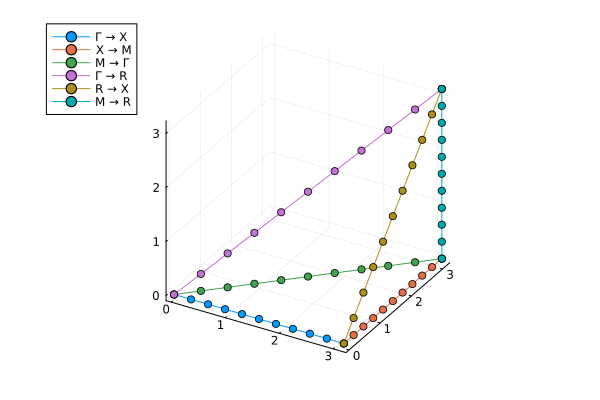

In [30]:
plot3d( gridPoints(kG)[Γ_to_X(kG)], label="Γ → X", marker= :circle)
plot3d!(gridPoints(kG)[X_to_M(kG)], label="X → M", marker= :circle)
plot3d!(gridPoints(kG)[M_to_Γ(kG)], label="M → Γ", marker= :circle)
plot3d!(gridPoints(kG)[Γ_to_R(kG)], label="Γ → R", marker= :circle)
plot3d!(gridPoints(kG)[R_to_X(kG)], label="R → X", marker= :circle)
plot3d!(gridPoints(kG)[M_to_R(kG)], label="M → R", marker= :circle)

# $\chi\left(\mathbf{q},\omega=0\right)$

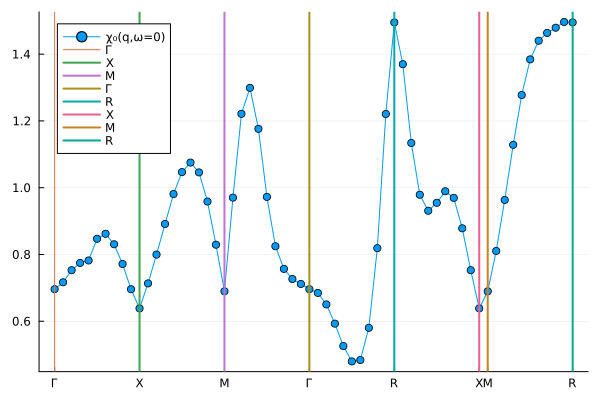

In [31]:
χ_symm_path = []
append!(χ_symm_path, χ₀[Γ_to_X(kG)[begin:end], begin])
X_point_1 = length(χ_symm_path)
append!(χ_symm_path, χ₀[X_to_M(kG)[begin+1:end], begin])
M_point_1 = length(χ_symm_path)
append!(χ_symm_path, χ₀[M_to_Γ(kG)[begin+1:end], begin])
Γ_point_2 = length(χ_symm_path)
append!(χ_symm_path, χ₀[Γ_to_R(kG)[begin+1:end], begin])
R_point_1 = length(χ_symm_path)
append!(χ_symm_path, χ₀[R_to_X(kG)[begin+1:end], begin])
X_point_2 = length(χ_symm_path)
M_point_2 = length(χ_symm_path) + 1
append!(χ_symm_path, χ₀[M_to_R(kG)[begin:end], begin])
R_point_2 = length(χ_symm_path)

p = plot(χ_symm_path, label="χ₀(q,ω=0)", marker= :circle, xticks = ([1, X_point_1, M_point_1, Γ_point_2, R_point_1, X_point_2, M_point_2, R_point_2], ["Γ", "X", "M", "Γ", "R", "X", "M", "R"]))

vline!(p, [1], label="Γ")
vline!(p, [X_point_1], label="X", linewidth=2)
vline!(p, [M_point_1], label="M", linewidth=2)
vline!(p, [Γ_point_2], label="Γ", linewidth=2)
vline!(p, [R_point_1], label="R", linewidth=2)
vline!(p, [X_point_2], label="X", linewidth=2)
vline!(p, [M_point_2], label="M", linewidth=2)
vline!(p, [R_point_2], label="R", linewidth=2)


# plot( χ₀[Γ_to_X(kG), begin], label="Γ → X", marker= :circle)
# plot!(χ₀[X_to_M(kG), begin], label="X → M", marker= :circle)
# plot!(χ₀[M_to_Γ(kG), begin], label="M → Γ", marker= :circle)
# plot!(χ₀[Γ_to_R(kG), begin], label="Γ → R", marker= :circle)
# plot!(χ₀[R_to_X(kG), begin], label="R → X", marker= :circle)
# plot!(χ₀[M_to_R(kG), begin], label="M → R", marker= :circle)

# $\omega\mapsto (i\omega)^2\chi\left(\mathbf{q},\omega\right)$

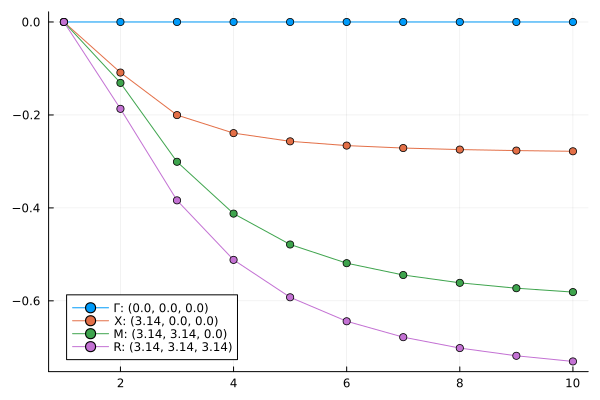

In [32]:
plot( -ω²_arr .* χ₀[Γ_index(kG),:], marker=:circle, label="Γ: $(round.(gridPoints(kG)[Γ_index(kG)],digits=2))")
plot!(-ω²_arr .* χ₀[X_index(kG),:], marker=:circle, label="X: $(round.(gridPoints(kG)[X_index(kG)],digits=2))")
plot!(-ω²_arr .* χ₀[M_index(kG),:], marker=:circle, label="M: $(round.(gridPoints(kG)[M_index(kG)],digits=2))")
plot!(-ω²_arr .* χ₀[R_index(kG),:], marker=:circle, label="R: $(round.(gridPoints(kG)[R_index(kG)],digits=2))")